In [18]:
import pandas as pd

df = pd.read_csv('tweets.csv')
# Ensure the tweet date is in datetime format
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
# Group by date to calculate total tweets and total engagement (retweets + favorites)
print(df.columns)
df_daily = df.groupby('date').agg(
    total_tweets=('id', 'count'),
    total_retweets=('retweet_count', 'sum'),
    total_favorites=('favorite_count', 'sum')
).reset_index()


# Calculate total engagement by adding retweets and favorites
df_daily['total_engagement'] = df_daily['total_retweets'] + df_daily['total_favorites']

# Find the day with the highest number of tweets
day_highest_tweets = df_daily.loc[df_daily['total_tweets'].idxmax()]

# Find the day with the lowest engagement
day_lowest_engagement = df_daily.loc[df_daily['total_engagement'].idxmin()]

# Output the results
print("Day with highest number of tweets:")
print(day_highest_tweets)

print("\nDay with lowest engagement:")
print(day_lowest_engagement)


Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities', 'date'],
      dtype='object')
Day with highest number of tweets:
date                2016-09-27
total_tweets               149
total_retweets         1340273
total_favorites        2789266
total_engagement       4129539
Name: 266, dtype: object

Day with lowest engagement:
date                2016-09-28
total_tweets                 1
total_retweets             218
total_favorites            651
total_engagement           869
Name: 267, dtype: object


No critical moments found where high tweets and low engagement occurred.


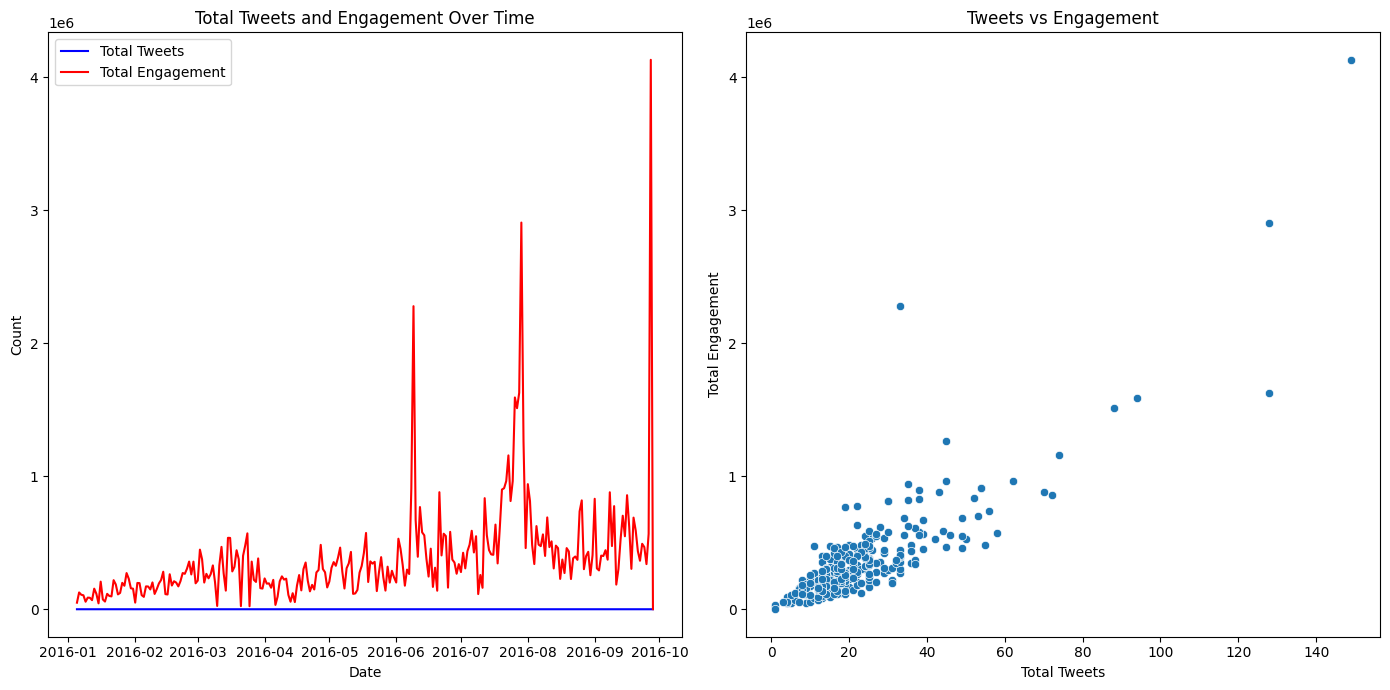

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('tweets.csv')

# Ensure the tweet date is in datetime format
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

# Group by date to calculate total tweets and total engagement (retweets + favorites)
df_daily = df.groupby('date').agg(
    total_tweets=('id', 'count'),
    total_retweets=('retweet_count', 'sum'),
    total_favorites=('favorite_count', 'sum')
).reset_index()

# Calculate total engagement by adding retweets and favorites
df_daily['total_engagement'] = df_daily['total_retweets'] + df_daily['total_favorites']

# Calculate mean and standard deviation for tweets and engagement
mean_tweets = df_daily['total_tweets'].mean()
std_tweets = df_daily['total_tweets'].std()
mean_engagement = df_daily['total_engagement'].mean()
std_engagement = df_daily['total_engagement'].std()

# Define thresholds for identifying critical moments (high tweets and low engagement)
high_tweets_threshold = mean_tweets + std_tweets  # High tweets: above mean + std
low_engagement_threshold = mean_engagement - std_engagement  # Low engagement: below mean - std

# Find the day with a high number of tweets and low engagement
critical_moments = df_daily[(df_daily['total_tweets'] > high_tweets_threshold) & 
                            (df_daily['total_engagement'] < low_engagement_threshold)]

# If there are multiple moments, you can select the one with the highest tweet count
if not critical_moments.empty:
    critical_moment = critical_moments.loc[critical_moments['total_tweets'].idxmax()]
    print("Critical moment: High number of tweets and low engagement")
    print(critical_moment)
else:
    print("No critical moments found where high tweets and low engagement occurred.")

# Visualize the daily tweets and engagement
plt.figure(figsize=(14, 7))

# Plot total tweets and total engagement
plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='total_tweets', data=df_daily, label='Total Tweets', color='blue')
sns.lineplot(x='date', y='total_engagement', data=df_daily, label='Total Engagement', color='red')
plt.title('Total Tweets and Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Highlight the critical moment
if not critical_moments.empty:
    plt.axvline(x=critical_moment['date'], color='green', linestyle='--', label='Critical Moment')
    plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x='total_tweets', y='total_engagement', data=df_daily)
plt.title('Tweets vs Engagement')
plt.xlabel('Total Tweets')
plt.ylabel('Total Engagement')

# Suggesting an alternative tweet based on observed patterns
# If the candidate has high tweet activity but low engagement, an alternative tweet could be based on:
# - Content strategy (use more engaging content, ask questions, use relevant hashtags)
# - Timing (tweet during peak engagement times based on analysis)

plt.tight_layout()
plt.show()

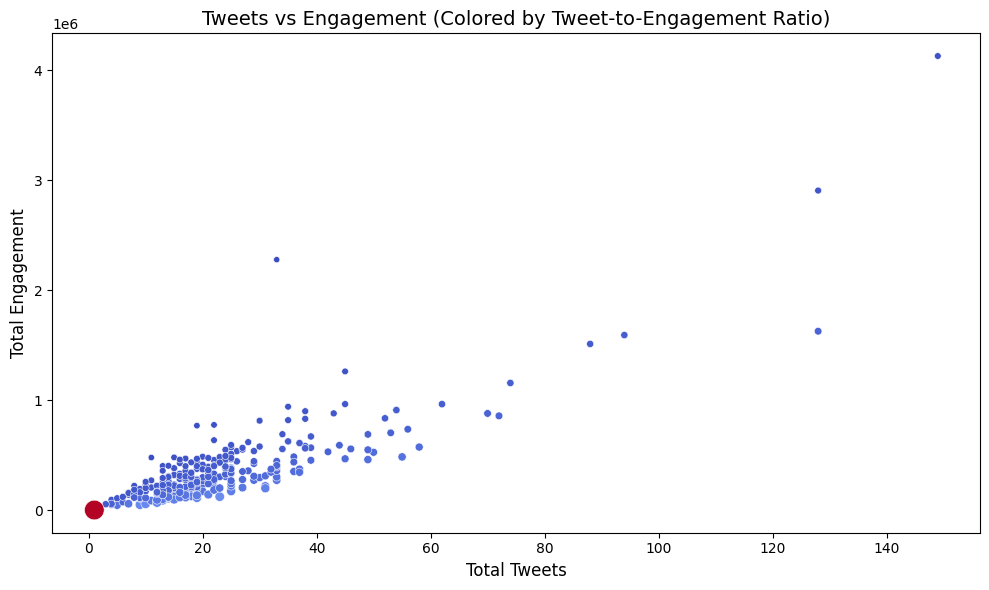

Critical moments (High tweets, low engagement):
           date  total_tweets  total_engagement  tweet_to_engagement_ratio
0    2016-01-05             9             49313                   0.000183
1    2016-01-06            18            126263                   0.000143
2    2016-01-07            14            108955                   0.000128
3    2016-01-08            14            104968                   0.000133
4    2016-01-09            10             56637                   0.000177
5    2016-01-10            13             87303                   0.000149
6    2016-01-11            11             86280                   0.000127
7    2016-01-12            12             68349                   0.000176
9    2016-01-14            14            116344                   0.000120
13   2016-01-18             7             57838                   0.000121
14   2016-01-19            17            115735                   0.000147
15   2016-01-20            13            100014     

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('tweets.csv')

# Ensure the tweet date is in datetime format
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

# Group by date to calculate total tweets and total engagement (retweets + favorites)
df_daily = df.groupby('date').agg(
    total_tweets=('id', 'count'),
    total_retweets=('retweet_count', 'sum'),
    total_favorites=('favorite_count', 'sum')
).reset_index()

# Calculate total engagement by adding retweets and favorites
df_daily['total_engagement'] = df_daily['total_retweets'] + df_daily['total_favorites']

# Calculate tweet-to-engagement ratio
df_daily['tweet_to_engagement_ratio'] = df_daily['total_tweets'] / (df_daily['total_engagement'] + 1)  # +1 to avoid division by zero

# Visualize tweets vs engagement with the ratio color coded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_tweets', y='total_engagement', data=df_daily, 
                hue='tweet_to_engagement_ratio', palette='coolwarm', size='tweet_to_engagement_ratio',
                sizes=(20, 200), legend=None)

# Add labels and title
plt.title('Tweets vs Engagement (Colored by Tweet-to-Engagement Ratio)', fontsize=14)
plt.xlabel('Total Tweets', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Now identify days with a high tweet-to-engagement ratio (potential critical moments)
# We'll consider days with high tweet count and low engagement based on the ratio
high_ratio_threshold = df_daily['tweet_to_engagement_ratio'].quantile(0.9)  # Top 10% by ratio

# Find the critical moments
critical_moments = df_daily[df_daily['tweet_to_engagement_ratio'] > high_ratio_threshold]

if not critical_moments.empty:
    print("Critical moments (High tweets, low engagement):")
    print(critical_moments[['date', 'total_tweets', 'total_engagement', 'tweet_to_engagement_ratio']])
else:
    print("No critical moments found.")


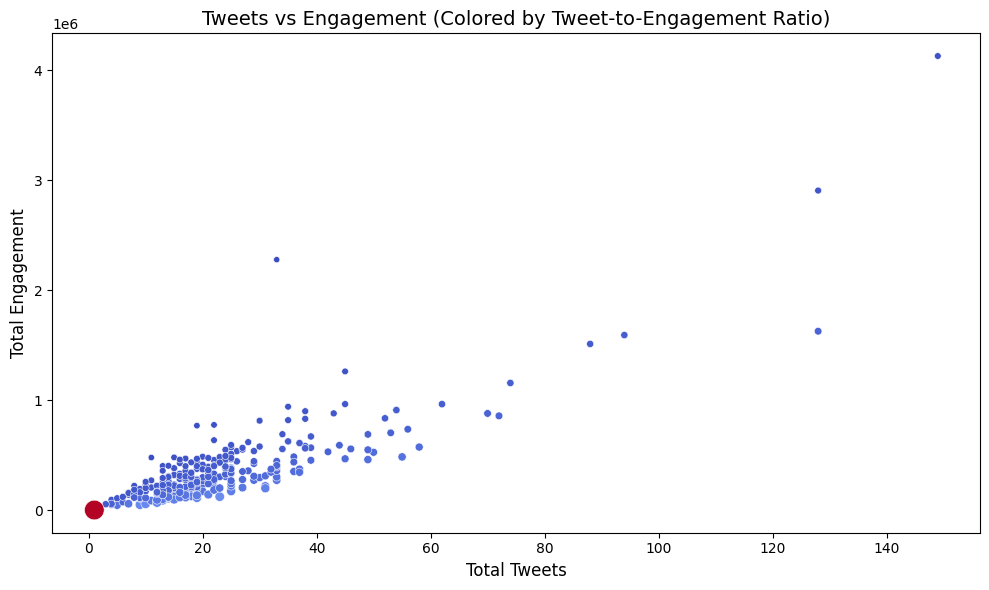

Critical moments (High tweets, low engagement):


,date,total_tweets,total_engagement,tweet_to_engagement_ratio
0,2016-01-05,9,49313,0.000183
1,2016-01-06,18,126263,0.000143
2,2016-01-07,14,108955,0.000128
3,2016-01-08,14,104968,0.000133
4,2016-01-09,10,56637,0.000177
5,2016-01-10,13,87303,0.000149
6,2016-01-11,11,86280,0.000127
7,2016-01-12,12,68349,0.000176
9,2016-01-14,14,116344,0.000120
13,2016-01-18,7,57838,0.000121


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # This helps render the table in Jupyter

# Load the dataset
df = pd.read_csv('tweets.csv')

# Ensure the tweet date is in datetime format
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date

# Group by date to calculate total tweets and total engagement (retweets + favorites)
df_daily = df.groupby('date').agg(
    total_tweets=('id', 'count'),
    total_retweets=('retweet_count', 'sum'),
    total_favorites=('favorite_count', 'sum')
).reset_index()

# Calculate total engagement by adding retweets and favorites
df_daily['total_engagement'] = df_daily['total_retweets'] + df_daily['total_favorites']

# Calculate tweet-to-engagement ratio
df_daily['tweet_to_engagement_ratio'] = df_daily['total_tweets'] / (df_daily['total_engagement'] + 1)  # +1 to avoid division by zero

# Visualize tweets vs engagement with the ratio color coded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_tweets', y='total_engagement', data=df_daily, 
                hue='tweet_to_engagement_ratio', palette='coolwarm', size='tweet_to_engagement_ratio',
                sizes=(20, 200), legend=None)

# Add labels and title
plt.title('Tweets vs Engagement (Colored by Tweet-to-Engagement Ratio)', fontsize=14)
plt.xlabel('Total Tweets', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Now identify days with a high tweet-to-engagement ratio (potential critical moments)
# We'll consider days with high tweet count and low engagement based on the ratio
high_ratio_threshold = df_daily['tweet_to_engagement_ratio'].quantile(0.9)  # Top 10% by ratio

# Find the critical moments
critical_moments = df_daily[df_daily['tweet_to_engagement_ratio'] > high_ratio_threshold]

if not critical_moments.empty:
    print("Critical moments (High tweets, low engagement):")
    display(critical_moments[['date', 'total_tweets', 'total_engagement', 'tweet_to_engagement_ratio']])
else:
    print("No critical moments found.")
